In [2]:
import nltk
import regex as re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from operator import itemgetter
from collections import Counter

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read().replace('\n','')
    # close the file
    file.close()
    return text

In [5]:
txt = load_doc('C:/Users/Reem/Documents/TDI/Movie-review-analysis/brave_imdb_user_reviews.txt')

In [6]:
txt_clean = re.sub(r'[^\w\s]','',txt).lower()

In [7]:
tokens = word_tokenize(txt_clean)
len(tokens)

133638

In [8]:
stop = list(set(nltk.corpus.stopwords.words('english')))

tokens_cleaned = []

for i in tokens:
    if i in stop:
        continue
    else: tokens_cleaned.append(i)

In [9]:
tt= nltk.pos_tag(tokens_cleaned)

In [10]:
adj = []

for k,j in tt:
    if j in ['JJ']:
        adj.append(k)

In [11]:
count = Counter(adj).items()
sorted_count = sorted(count, key = itemgetter(1))
sorted_count.reverse()

In [12]:
adj_txt = " ".join(adjrev for adjrev in adj)

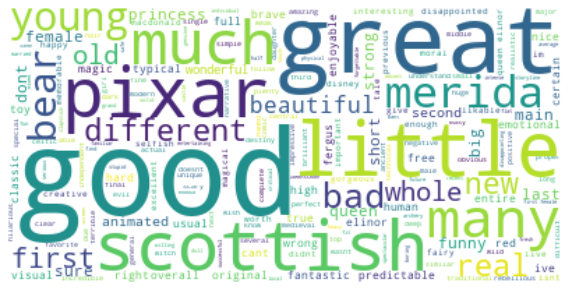

In [13]:
wordcloud_adj = WordCloud(background_color="white").generate(adj_txt)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_adj, interpolation='bilinear')
plt.axis("off")
plt.savefig('brave-wordcloud.jpg')
plt.show()


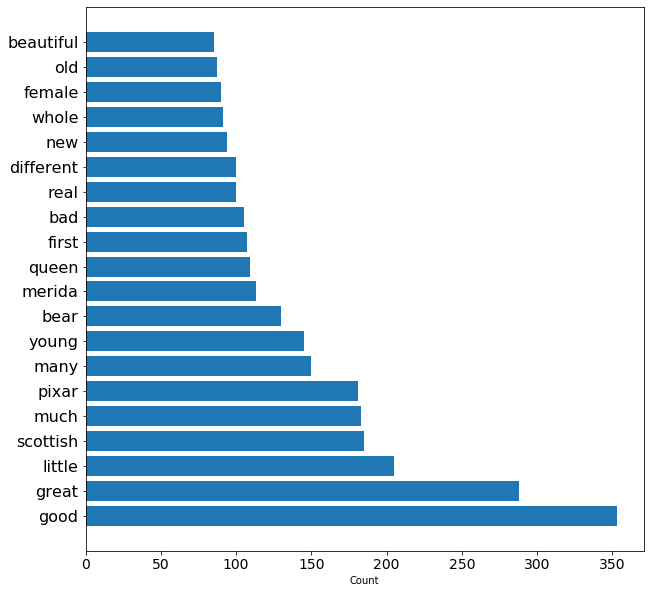

In [14]:
word_count_dict = dict(sorted_count[0:20])

x = list(word_count_dict.keys())
y = list(word_count_dict.values())

plt.figure(figsize=(10, 10))
plt.barh(x,y)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel('Count')
plt.savefig('brave-top-20.png')
plt.show()
